## Tarea No. 4
##### Osiel Gutierrez Herrera
##### Carne 21000958

## 0. Determinacion de Tipos de Variables:

##### Adicionamos las librerias y cargamos el dataset para la evaluacion

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##### Carga de dataset

In [27]:
dataset = pd.read_csv('train_HP.csv')

##### Visualizacion de dataset

In [28]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Visualizacion de el tipo de datos en columnas de dataset y determinacion de variables

In [29]:
dataset.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

#### Verificación de las columnas con NaN

In [30]:
def getNanColNames(df):
    colnames = df.columns
    cols_con_na = []
    for col in colnames:
        if(df[col].isnull().sum() > 0):
            cols_con_na.append(col)
    return cols_con_na

In [31]:
cols_con_nan = getNanColNames(dataset)
cols_con_nan

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

#### Varificacion de los tipos de datos de columnas con NaN

In [32]:
dataset[cols_con_nan].dtypes

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

In [33]:
dataset[cols_con_nan].shape

(1460, 19)

#### Varificacion de proporción de NaN

In [34]:
dataset[cols_con_nan].isnull().mean()

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

In [35]:
def getNanGoodColsNames(df, rate = 0.2):
    cols_procesables = []
    for col in df.columns:
        if((df[col].isnull().mean() < rate)):
            cols_procesables.append(col)
    return cols_procesables

In [36]:
cols_cca = getNanGoodColsNames(dataset, 0.05)
cols_cca

['Id',
 'MSSubClass',
 'MSZoning',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCond

### Criterio de CCA (Complete Case Analysis)  5%

####  Se refiere a remover todas las observaciones que posean faltantes en cualquier variable del dataset Se recomienda usar cuando la cantidad de datos faltantes es menor al 5%.

In [37]:
dataset_sin_nan = dataset[cols_cca].dropna()

In [38]:
dataset_sin_nan.shape, dataset.shape

((1412, 70), (1460, 81))

### Imputación de Media y Mediana

In [39]:
datasetimp.dtypes

Id                int64
MSSubClass        int64
MSZoning         object
LotArea           int64
Street           object
                  ...  
MoSold            int64
YrSold            int64
SaleType         object
SaleCondition    object
SalePrice         int64
Length: 70, dtype: object

In [40]:
datasetimp = dataset_sin_nan

In [41]:
def floatsvar(df):
    intfloat = []
    for col in df.columns:
        if (datasetimp[col].dtypes == 'int64'):
            intfloat.append(col)
    return intfloat

In [42]:
datasetimp1 = floatsvar(datasetimp)
datasetimp1

['Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [43]:
datasetimp2 = dataset[datasetimp1]

In [44]:
datasetimp2.shape

(1460, 35)

In [45]:
datasetimp2.median()

Id                  730.5
MSSubClass           50.0
LotArea            9478.5
OverallQual           6.0
OverallCond           5.0
YearBuilt          1973.0
YearRemodAdd       1994.0
BsmtFinSF1          383.5
BsmtFinSF2            0.0
BsmtUnfSF           477.5
TotalBsmtSF         991.5
1stFlrSF           1087.0
2ndFlrSF              0.0
LowQualFinSF          0.0
GrLivArea          1464.0
BsmtFullBath          0.0
BsmtHalfBath          0.0
FullBath              2.0
HalfBath              0.0
BedroomAbvGr          3.0
KitchenAbvGr          1.0
TotRmsAbvGrd          6.0
Fireplaces            1.0
GarageCars            2.0
GarageArea          480.0
WoodDeckSF            0.0
OpenPorchSF          25.0
EnclosedPorch         0.0
3SsnPorch             0.0
ScreenPorch           0.0
PoolArea              0.0
MiscVal               0.0
MoSold                6.0
YrSold             2008.0
SalePrice        163000.0
dtype: float64

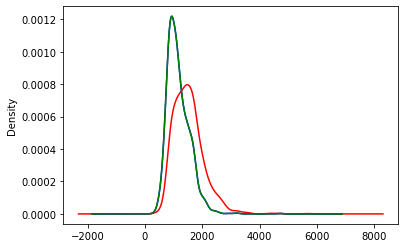

In [46]:
fig = plt.figure()
fig.add_subplot(111)

datasetimp2['GrLivArea'].plot.density(color="red")
dataset_FL_meanImp.plot.density(color="blue")
dataset_FL_medianImp.plot.density(color="green")
plt.show()

### Evaluación de variables (float64)

In [47]:
# Evaluación de variables (float64)
# YearBuilt = mediana
# YearRemodAdd =  mediana
# 1stFlrSF = mediana
# GrLivArea = mediana
# YrSold = median

In [48]:
meanValue = np.round(datasetimp2['1stFlrSF'].mean(), 0)
medianValue = np.round(datasetimp2['1stFlrSF'].median(), 0)
dataset_FL_meanImp = datasetimp2['1stFlrSF'].fillna(meanValue)
dataset_FL_medianImp = datasetimp2['1stFlrSF'].fillna(medianValue)
cmedia = np.corrcoef(dataset_FL_meanImp, datasetimp2['SalePrice'])[0,1]
cmediana = np.corrcoef(dataset_FL_medianImp, datasetimp2['SalePrice'])[0,1]
compvalue = [cmedia, cmediana]
x = max(compvalue)

In [49]:
def getcompvalue(compvalue):
    resultado = x
    return resultado
print(x)

0.6058521846919148


In [50]:
if x == meanValue:
    print("Media")
else: 
    print("Mediana")

Mediana


### Evaluación de las variables antes descritas por correlación entre media y mediana y la mejor correlacion en las fue de mediana, se imputaran las columas por mediana. 

In [51]:
datasetimp['LotArea'] = datasetimp2['LotArea'].fillna(medianValue)

In [52]:
datasetimp['YearBuilt'] = datasetimp2['YearBuilt'].fillna(medianValue)

In [53]:
datasetimp['YearRemodAdd'] = datasetimp2['YearRemodAdd'].fillna(medianValue)

In [54]:
datasetimp['1stFlrSF'] = datasetimp2['1stFlrSF'].fillna(medianValue)

In [55]:
datasetimp['GrLivArea'] = datasetimp2['GrLivArea'].fillna(medianValue)

In [56]:
datasetimp['YrSold'] = datasetimp2['YrSold'].fillna(medianValue)

In [57]:
datasetimp.dtypes

Id                int64
MSSubClass        int64
MSZoning         object
LotArea           int64
Street           object
                  ...  
MoSold            int64
YrSold            int64
SaleType         object
SaleCondition    object
SalePrice         int64
Length: 70, dtype: object

In [58]:
datasetimp.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


## Imputación de Categirias Faltantes

In [59]:
datasetimp.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 70, dtype: int64

In [60]:
datacat = datasetimp

In [61]:
datacat['MSZoning'].value_counts()/len(datacat)

RL         0.786827
RM         0.151558
FV         0.043909
RH         0.010623
C (all)    0.007082
Name: MSZoning, dtype: float64

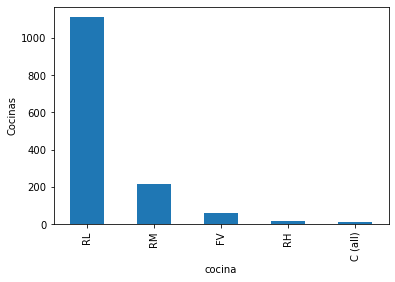

In [62]:
datacat['MSZoning'].value_counts().sort_values(ascending=False).plot.bar()
plt.ylabel("Cocinas")
plt.xlabel("cocina")
plt.show()

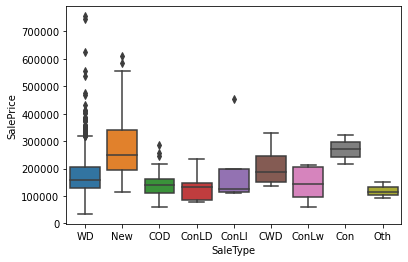

In [63]:
import seaborn as sns
sales = datacat['SalePrice']
bsq = datacat['SaleType']
sns.boxplot(x=bsq, y=sales)
plt.show()

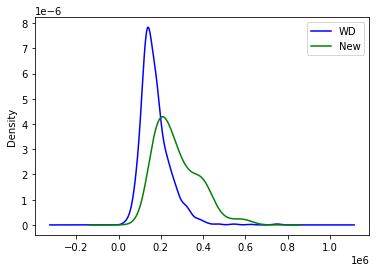

In [64]:
fig = plt.figure()
ax = fig.add_subplot(111)

datacat[datacat['SaleType'] == 'WD']['SalePrice'].plot(kind="kde", color="blue", label="WD")
datacat[datacat['SaleType'] == 'New']['SalePrice'].plot(kind="kde", color="green", label="New")
ax.legend()
plt.show()

In [65]:
datacat['SaleType'].fillna('3', inplace=True) 

In [66]:
datacat.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


## Codificación de Variables Categóricas

In [67]:
def getCategoryVars(df):
    colnames = df.columns
    cat_cols = []
    for col in colnames:
        if(df[col].dtype == 'object'):
            cat_cols.append(col)
    return cat_cols

In [68]:
cat_cols = getCategoryVars(datacat)

In [69]:
cat_cols

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [70]:
cat_cols.append('SalePrice')

In [71]:
dataset_categorics = datacat[cat_cols]

In [72]:
dataset_cat = dataset_categorics

In [73]:
dataset_categorics.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition,SalePrice
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal,208500
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,GasA,Ex,Y,SBrkr,TA,Typ,Y,WD,Normal,181500
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal,223500
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,GasA,Gd,Y,SBrkr,Gd,Typ,Y,WD,Abnorml,140000
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal,250000


In [74]:
dataset_categorics['Street'].value_counts()

Pave    1406
Grvl       6
Name: Street, dtype: int64

### Frequency Encodign

#### Se refiere al proceso de producir valores numéricos a partir de una variable categórica, esto con la finalidad de: 

#### • Producir variables numéricas que pueden ser utilizadas por el algoritmo de ML.
#### • Producir nuevas características a partir de las categorías disponibles en el dataset.

In [75]:
dataset_categorics['Street'].value_counts().sort_values(ascending=False)

Pave    1406
Grvl       6
Name: Street, dtype: int64

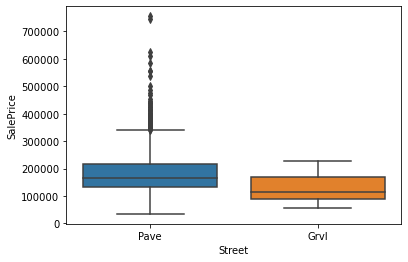

In [76]:
sales = dataset_categorics['SalePrice']
st = dataset_categorics['Street']
sns.boxplot(x=st, y=sales)
plt.show()


In [77]:
freq_mapper = (dataset_categorics['Street'].value_counts().sort_values(ascending=False)).to_dict()
freq_mapper

{'Pave': 1406, 'Grvl': 6}

In [78]:
dataset_categorics['Street'] = dataset_categorics['Street'].map(freq_mapper) 

C:\Users\oguti\AppData\Local\Temp/ipykernel_7424/2019499476.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_categorics['Street'] = dataset_categorics['Street'].map(freq_mapper)


In [79]:
density_mapper = (dataset_categorics['Street'].value_counts().sort_values(ascending=False)/len(dataset_categorics['Street'])).to_dict()
density_mapper

{1406: 0.9957507082152974, 6: 0.00424929178470255}

In [80]:
def executeFreqEncoding(df, map_type='freq'):
    colnames = df.columns
    for col in colnames:
        if(df[col].dtype == 'object'):
            factor_div = 1 if (map_type == 'freq') else len(df[col])
            mapper = (df[col].value_counts().sort_values(ascending=False)/factor_div).to_dict()
            df[col] = df[col].map(mapper) 

In [81]:
dataencod = datacat

In [82]:
executeFreqEncoding(dataencod)

In [83]:
dataencod.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,1111.0,8450,1406.0,886.0,1267.0,1411.0,1015.0,1335.0,...,0,0,0,0,0,2,2008,1224.0,1159.0,208500
1,2,20,1111.0,9600,1406.0,886.0,1267.0,1411.0,46.0,1335.0,...,0,0,0,0,0,5,2007,1224.0,1159.0,181500
2,3,60,1111.0,11250,1406.0,476.0,1267.0,1411.0,1015.0,1335.0,...,0,0,0,0,0,9,2008,1224.0,1159.0,223500
3,4,70,1111.0,9550,1406.0,476.0,1267.0,1411.0,256.0,1335.0,...,272,0,0,0,0,2,2006,1224.0,100.0,140000
4,5,60,1111.0,14260,1406.0,476.0,1267.0,1411.0,46.0,1335.0,...,0,0,0,0,0,12,2008,1224.0,1159.0,250000


### Transformación de Variables Numéricas:

In [84]:
import scipy.stats as stats

In [85]:
len(dataencod['LotArea'].unique())

1050

In [86]:
def getContinuesCols(df):
    colnames = df.columns
    numeric_continues_vars = []
    for col in colnames:
        unique_values =len (df[col].unique())
        if((df[col].dtype != 'object') and (unique_values > 30)):
            numeric_continues_vars.append(col)
    return numeric_continues_vars

In [87]:
numeric_cont_vars = getContinuesCols(dataencod)
numeric_cont_vars

['Id',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

In [88]:
def plot_density_variable(df, variable):
    
    plt.figure(figsize = (15,6))
    plt.subplot(121)
    df[variable].hist(bins=30)
    plt.title(variable)
    
    plt.subplot(122)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

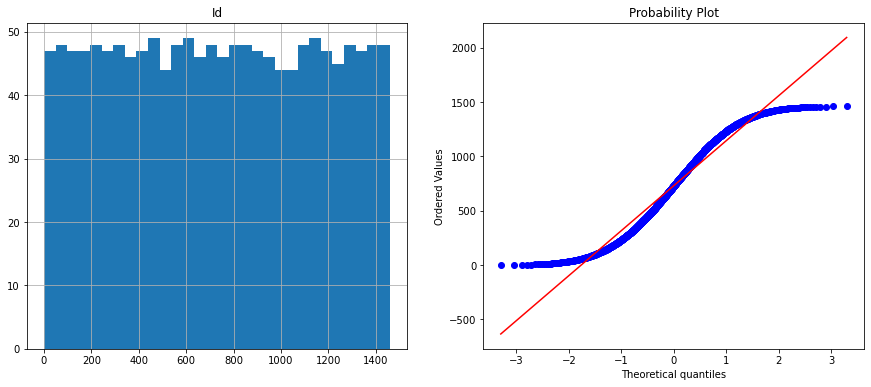

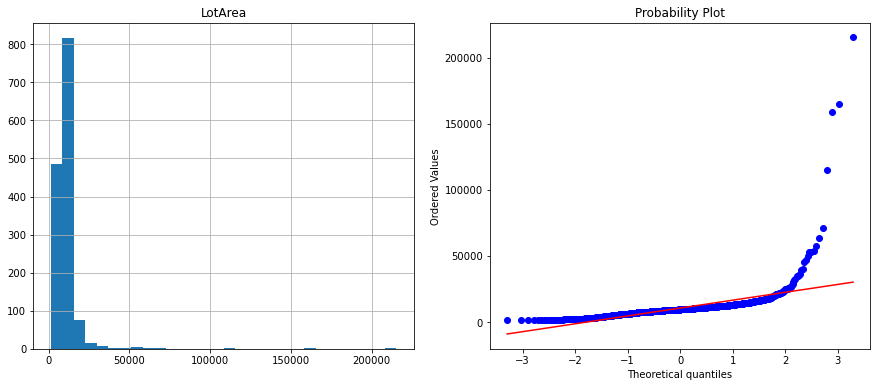

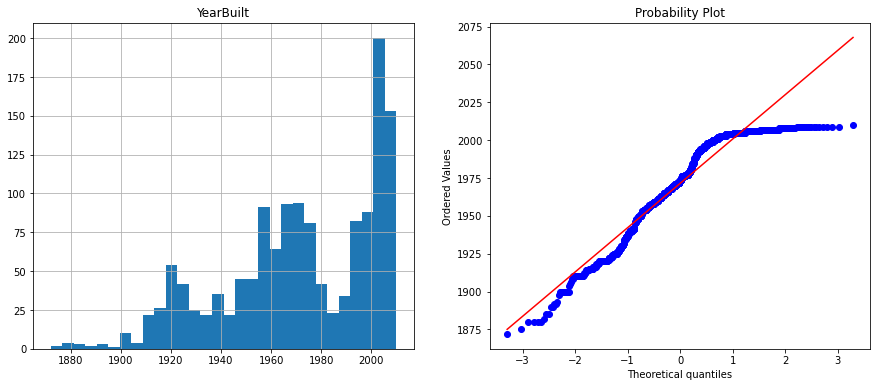

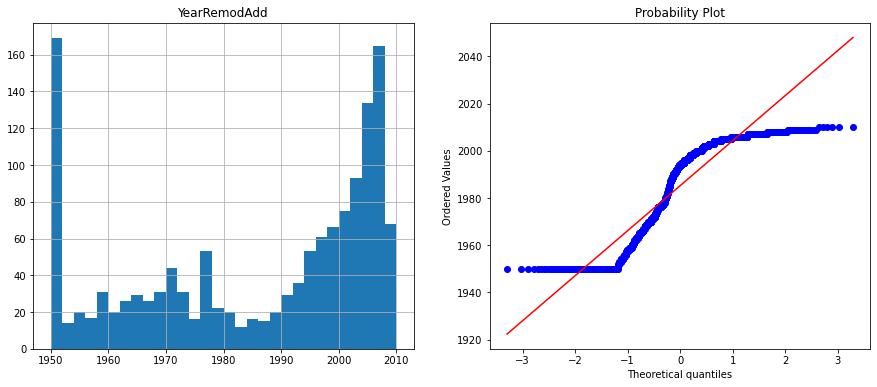

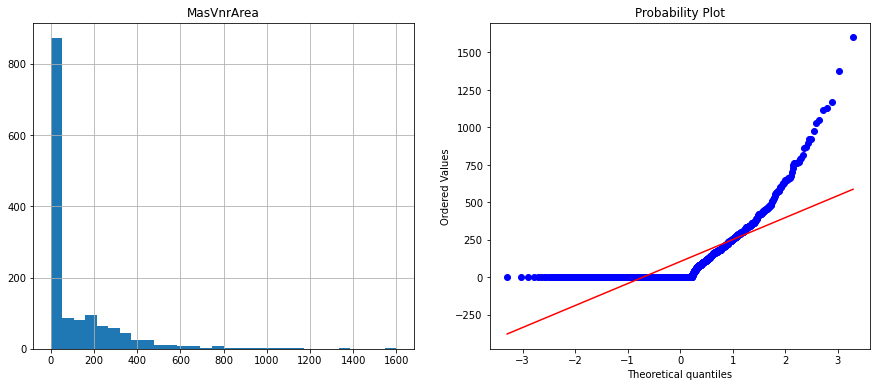

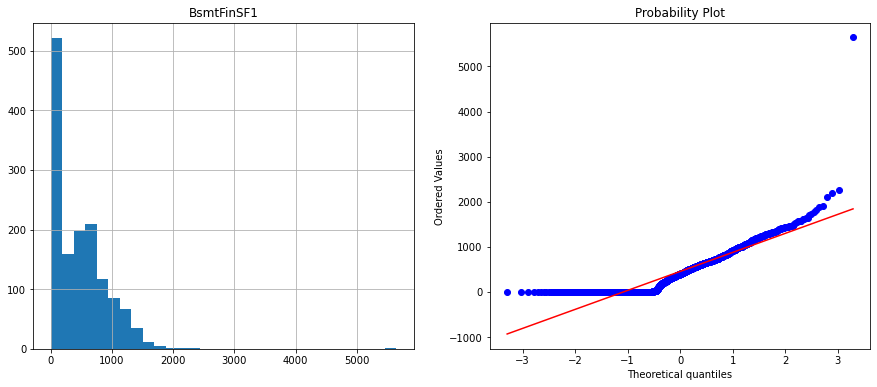

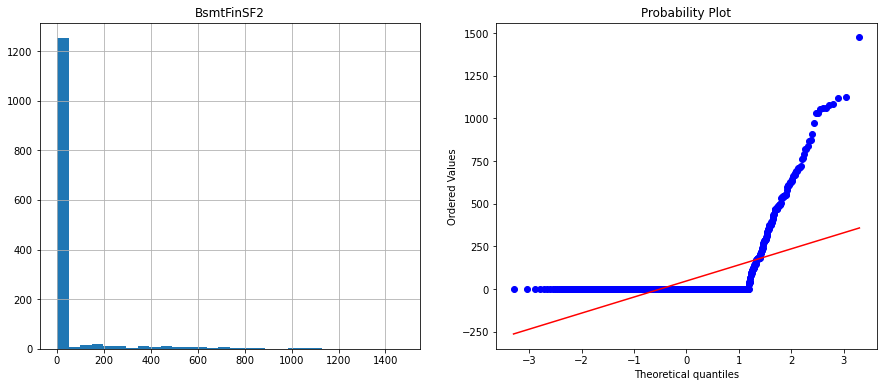

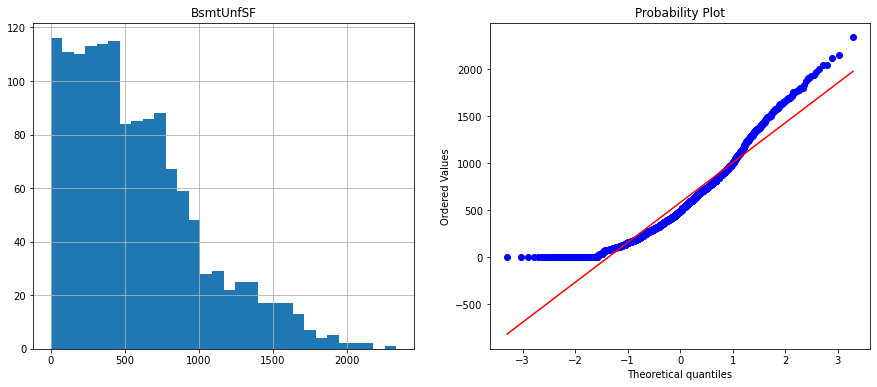

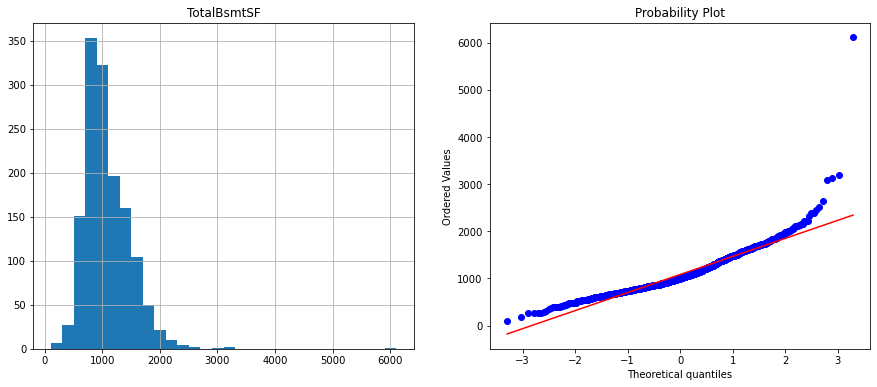

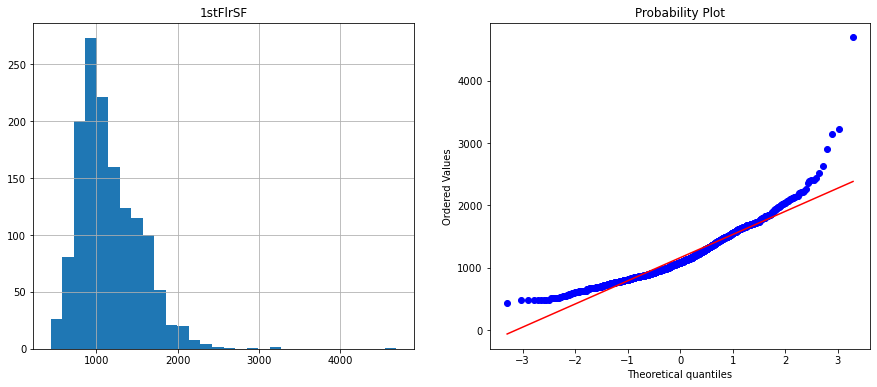

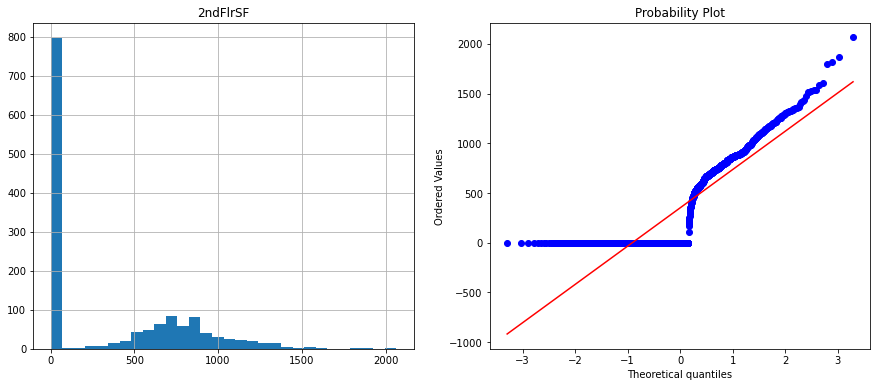

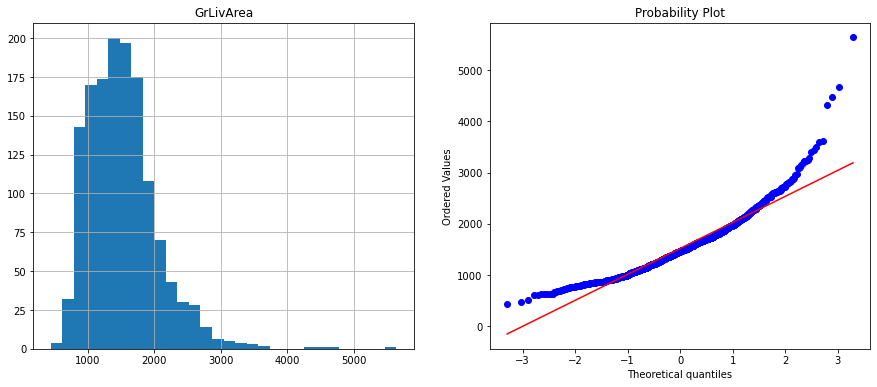

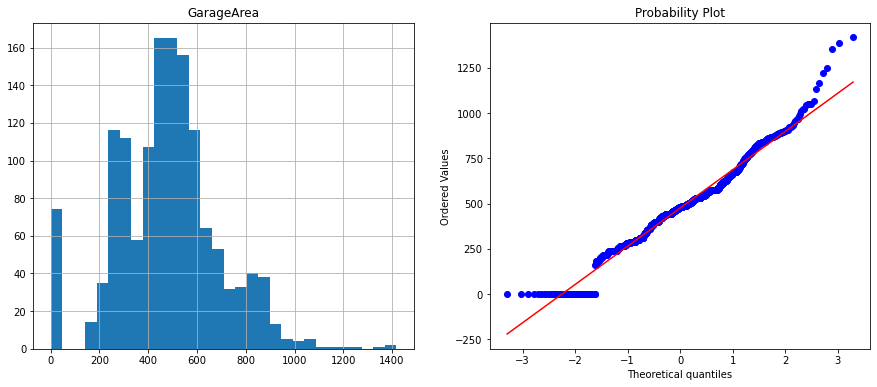

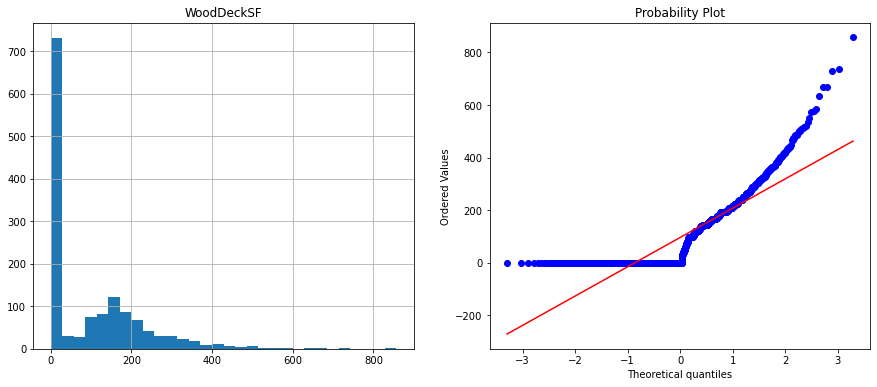

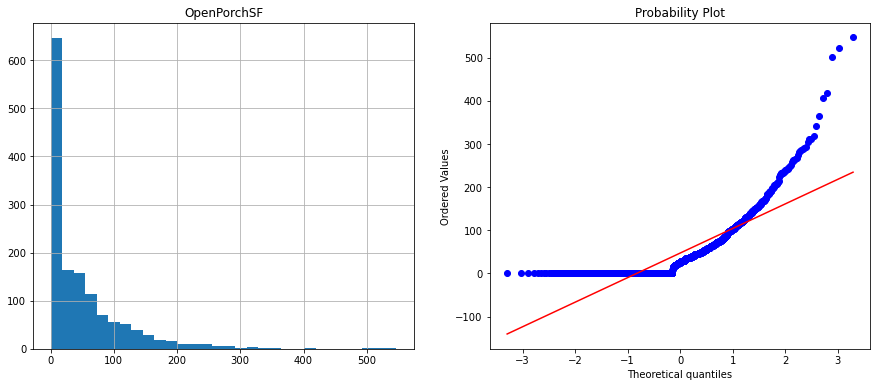

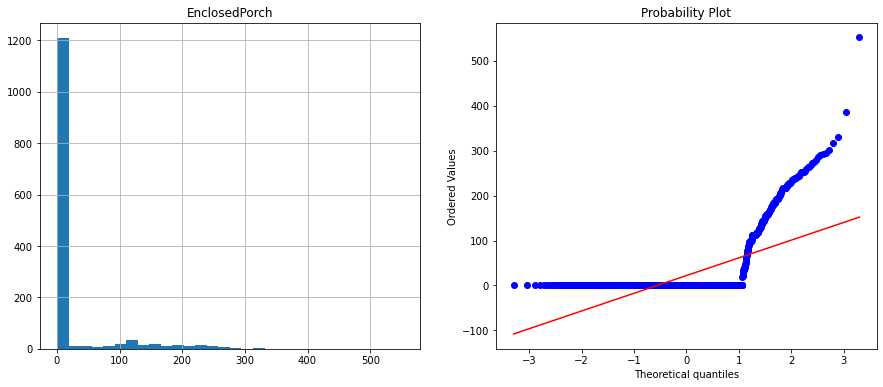

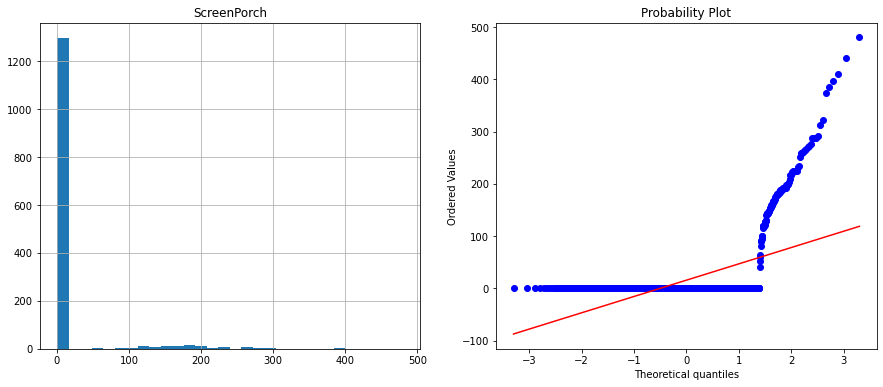

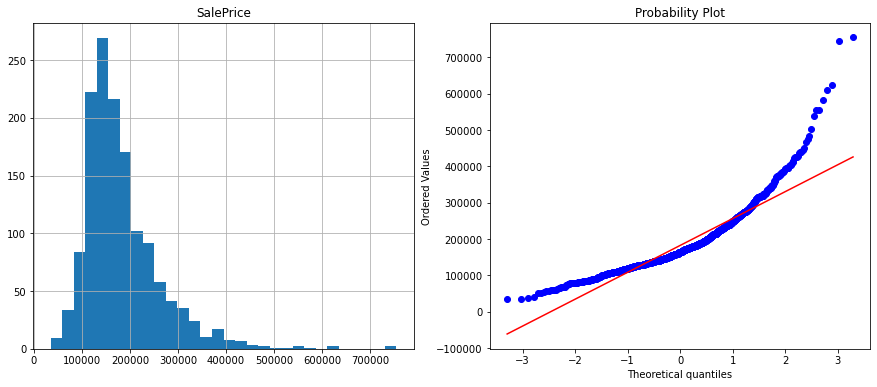

In [89]:
for col in numeric_cont_vars:
        plot_density_variable(dataencod, col)

In [90]:
dataset_temp = dataencod.loc[:, ['GrLivArea', 'SalePrice']]
dataset_temp.head()

,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000


### Transformación de BoxCox

###### Es una transformación de datos de uso común en el modelado estadístico y se utiliza para variables de respuesta continua que no cumplen con la distribución normal.

In [91]:
dataset_temp['GrLivArea_BC'], lambdaX = stats.boxcox(dataset_temp['GrLivArea'])

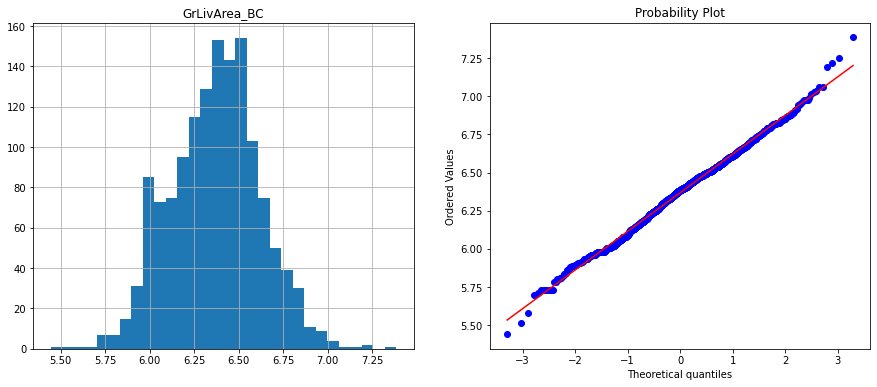

In [92]:
plot_density_variable(dataset_temp, 'GrLivArea_BC')

In [93]:
np.corrcoef(dataset_temp['GrLivArea_BC'], dataset_temp['SalePrice'])[0, 1]


0.6969525504991249

In [94]:
dataout = dataencod


###  Outliers

###### Como sabemos un outlier se refiere a un valor que está muy desviado del grueso de la distribución de los datos de una variable

###### Como sabemos un outlier se refiere a un valor que está muy desviado del  grueso de la distribución de los datos de una variable

In [95]:
def inspect_outliers(df, variable):
    
    plt.figure(figsize = (15,6))
    
    plt.subplot(131)
    sns.distplot(df[variable], bins=30)
    plt.title("Densisd-Histograma: " +col)
    
    plt.subplot(132)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title("QQ-Plot: "+ col )
    
    plt.subplot(133)
    sns.boxplot(y=df[variable])
    plt.title("Boxplot: "+ col)
    
    plt.show()

c:\Users\oguti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


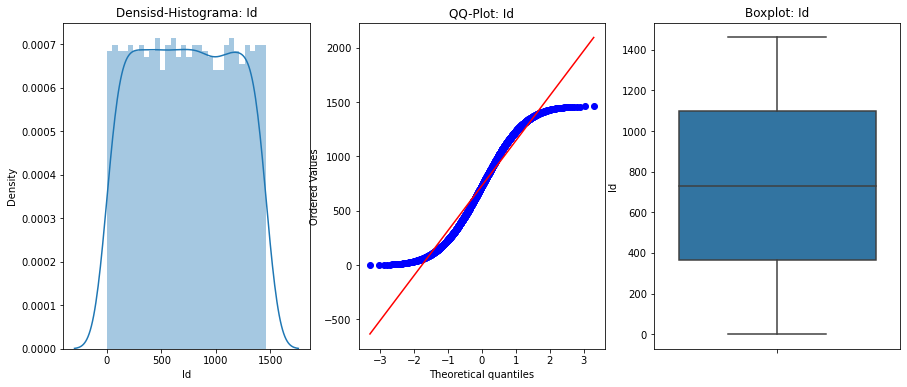

c:\Users\oguti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


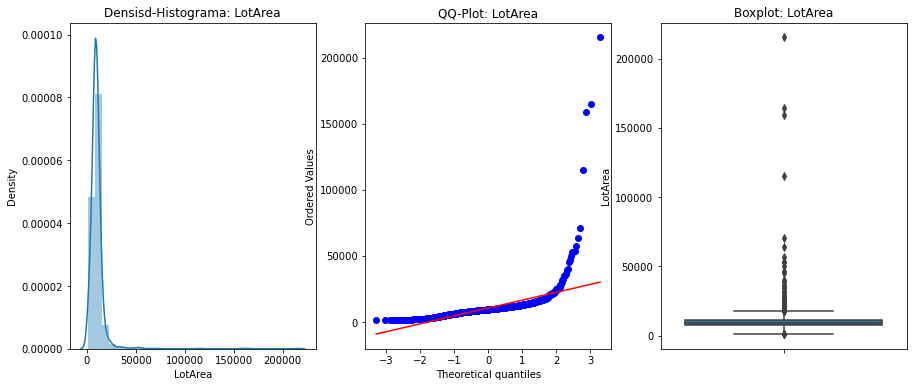

c:\Users\oguti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


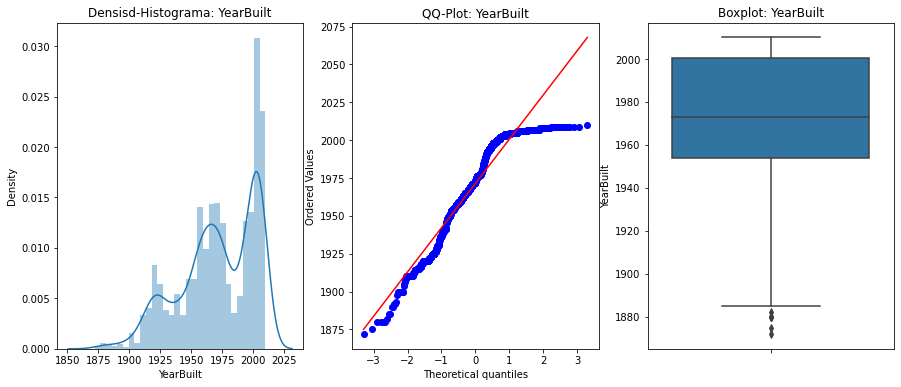

c:\Users\oguti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


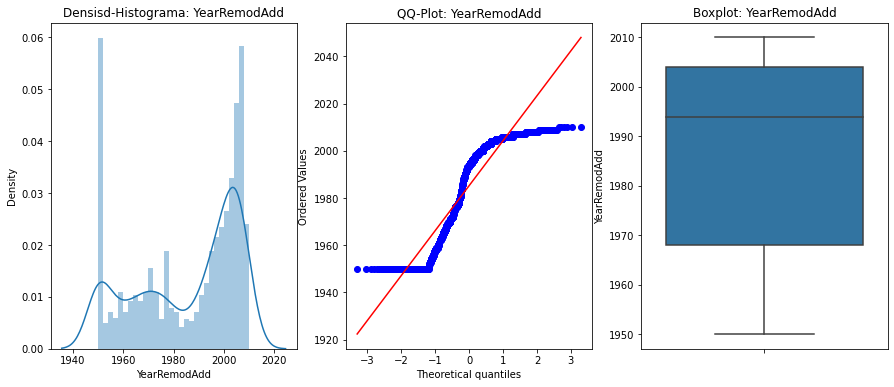

c:\Users\oguti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


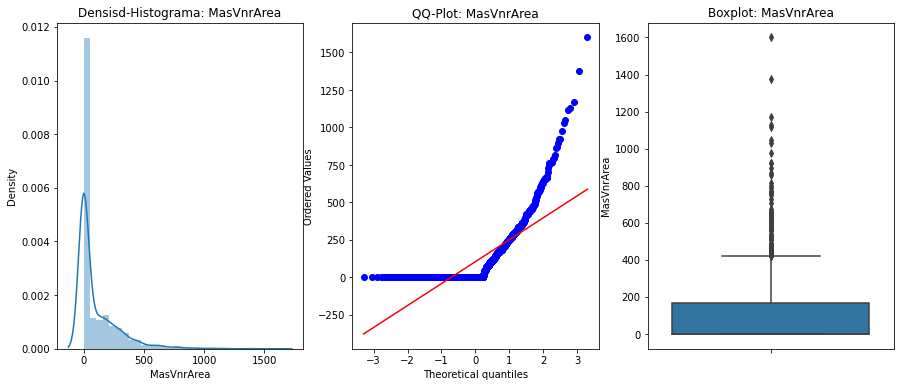

c:\Users\oguti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


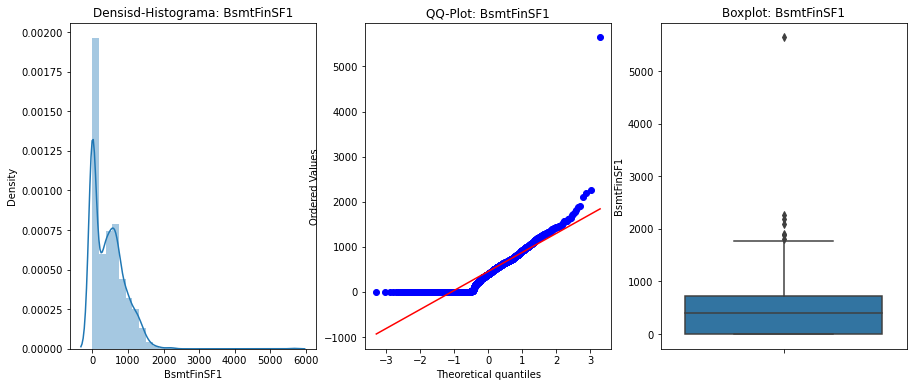

c:\Users\oguti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


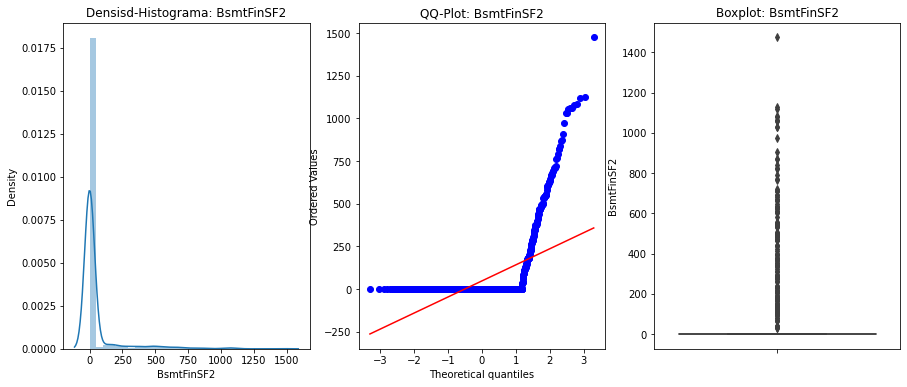

c:\Users\oguti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


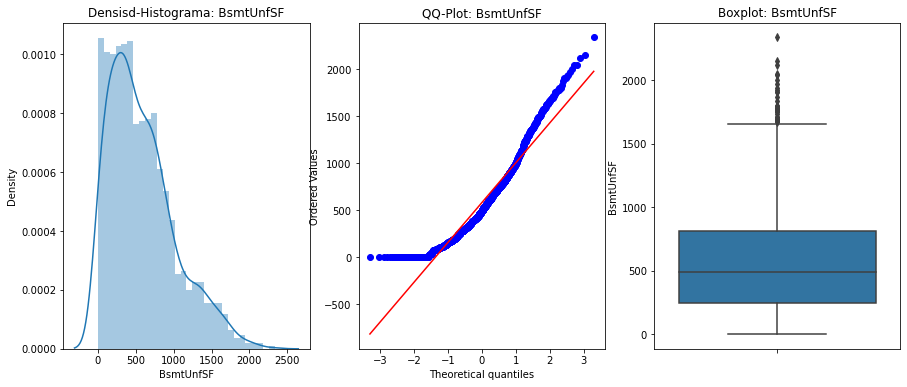

c:\Users\oguti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


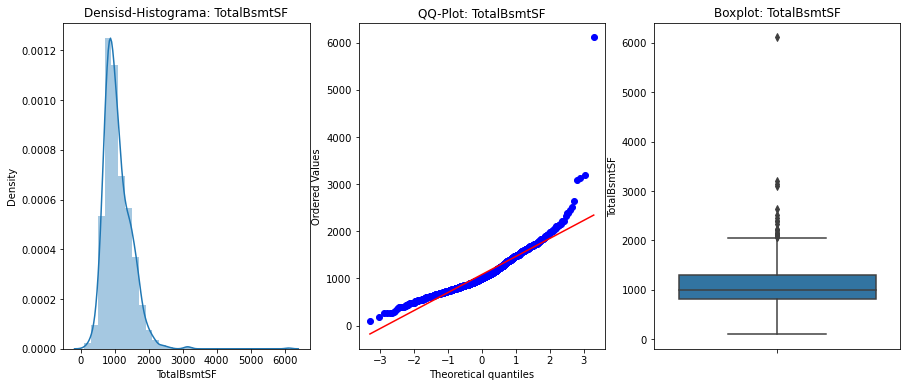

c:\Users\oguti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


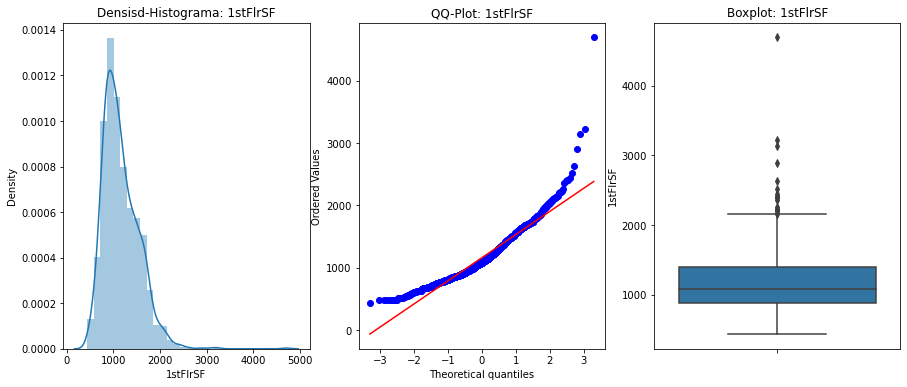

c:\Users\oguti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


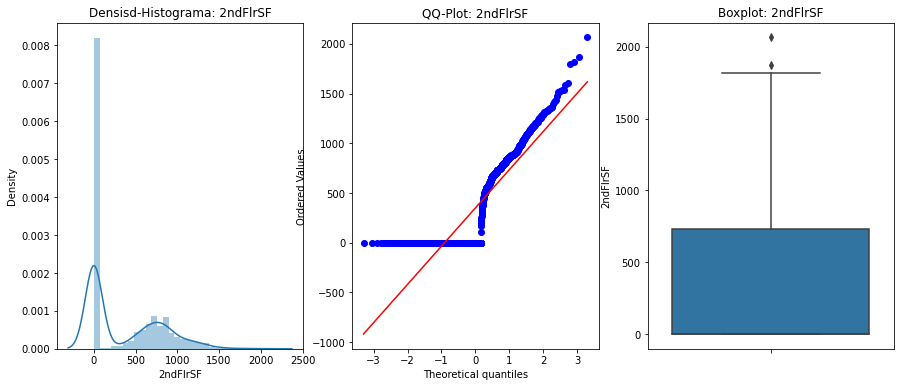

c:\Users\oguti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


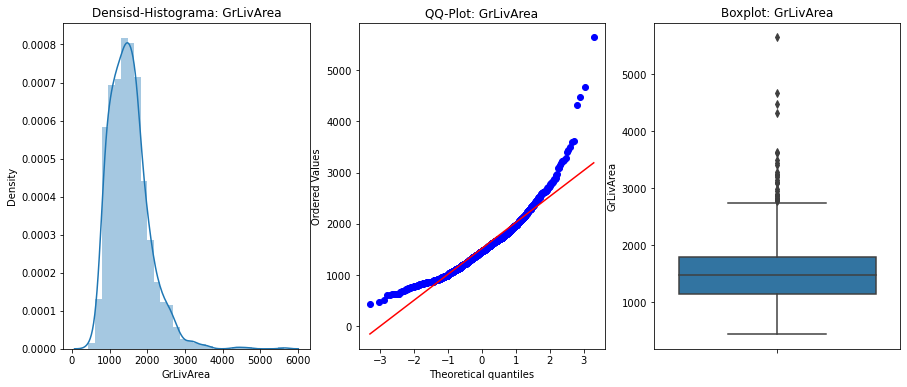

c:\Users\oguti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


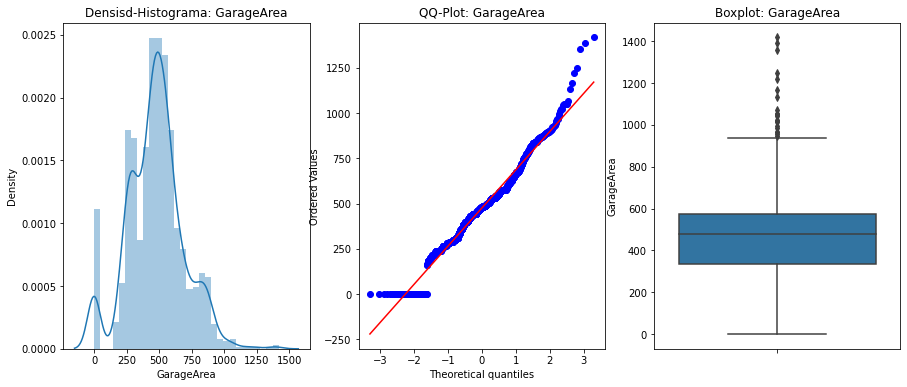

c:\Users\oguti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


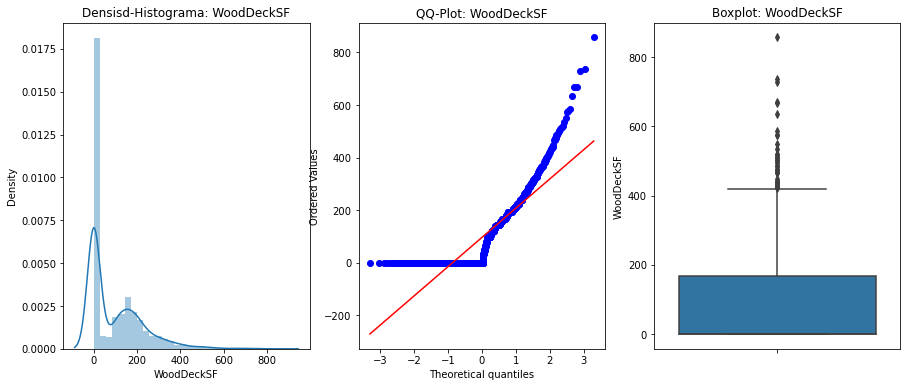

c:\Users\oguti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


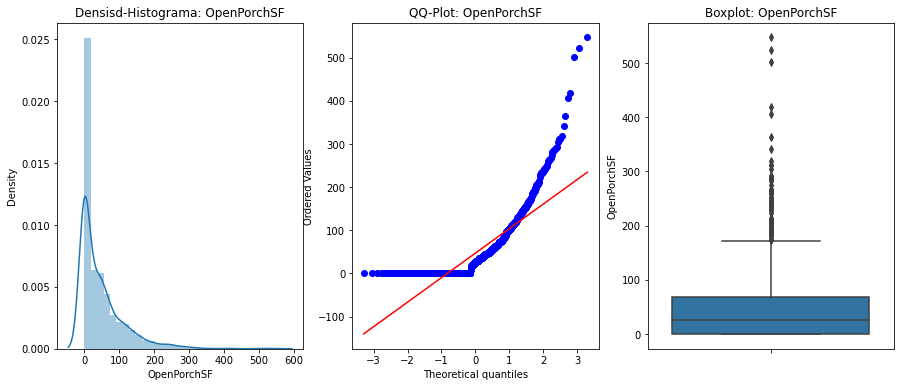

c:\Users\oguti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


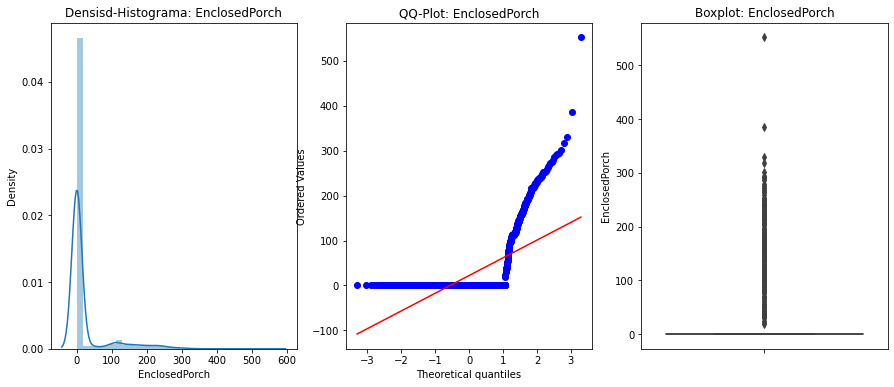

c:\Users\oguti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


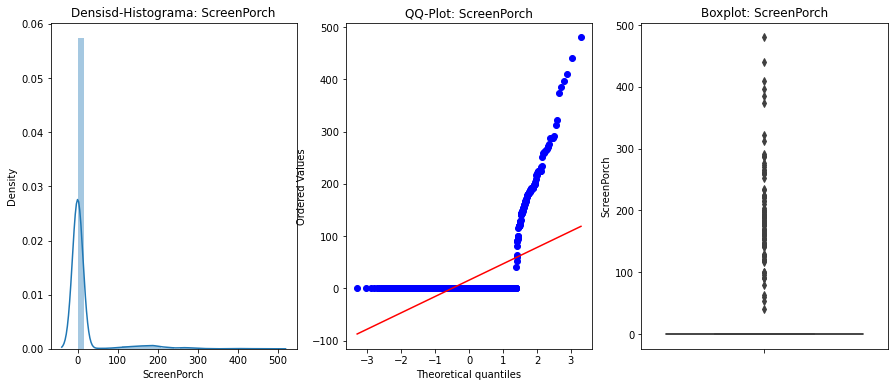

c:\Users\oguti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


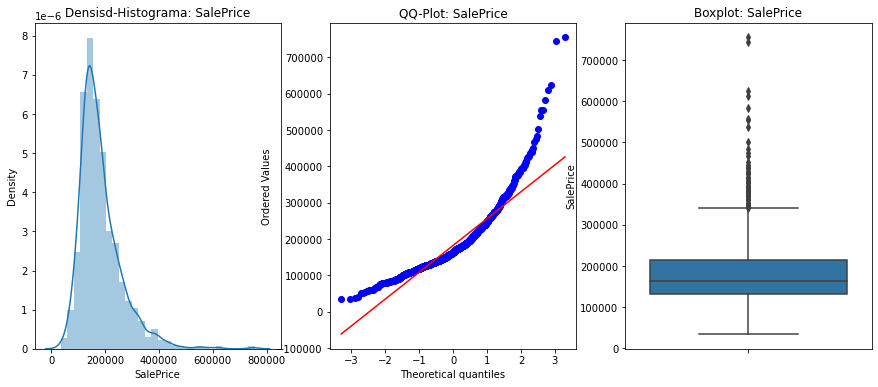

In [96]:
for col in numeric_cont_vars:
    inspect_outliers(dataout, col)

In [97]:
numeric_cont_vars

['Id',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

### Funcion para detectar Outliders


In [98]:
def detect_outliers(df, variable, factor):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    LI = df[variable].quantile(0.25) - (IQR*factor)
    LS = df[variable].quantile(0.75) + (IQR*factor)
    
    return LI, LS

### Capping

###### Consiste en convertir los outliers a los valores limites dentro de   distribución de la variable. 
###### Este método evita la reducción del dataset original.


In [99]:
datacap = dataout

In [100]:
datacap.shape

(1412, 70)

In [101]:
limites = detect_outliers(datacap, 'MasVnrArea', 1.75)
LF_LI, LF_LS = limites

In [102]:
datacap['MasVnrArea_cap'] = np.where(datacap['MasVnrArea'] > LF_LS, LF_LS,
                                          np.where(datacap['MasVnrArea'] < LF_LI, LF_LI, datacap['MasVnrArea'])) 

c:\Users\oguti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


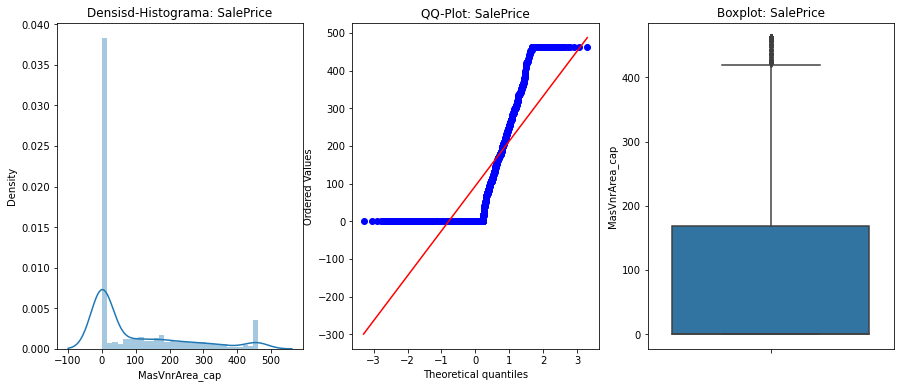

In [103]:
inspect_outliers(datacap, 'MasVnrArea_cap')

### IQR 

###### Si existe un sesgo en la distribución de la variable, podemos usar la información del IQR para generar el valor
###### Por su naturaleza numérica, solo se puede aplicar a variables numéricas.


In [104]:
# IQR = 75 QUANTILE - 25 CUANTILE
# LS = 75 CUANTILE + 1.75 * IQR
# LI = 25 CUANTILE -  1.75 * IQR 

In [105]:
def outlier_treatment(df, variable, factor):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    LI = df[variable].quantile(0.25) - (IQR*factor)
    LS = df[variable].quantile(0.75) + (IQR*factor)
    
    df[variable] = np.where(df[variable] > LS, LS,
                                          np.where(df[variable] < LI, LI, df[variable])) 

c:\Users\oguti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


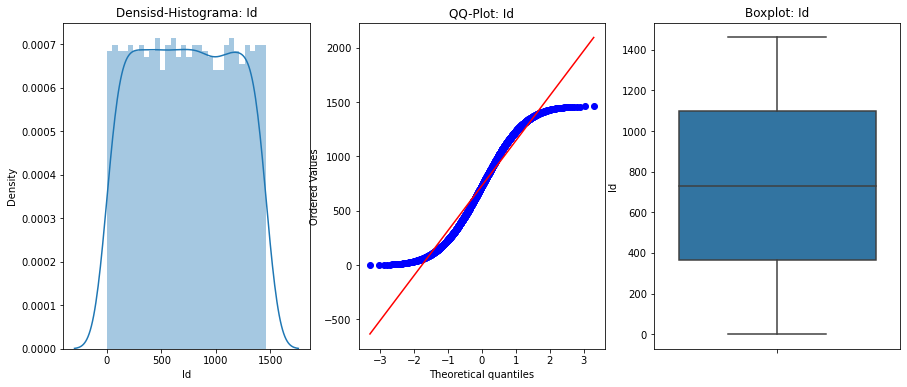

c:\Users\oguti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


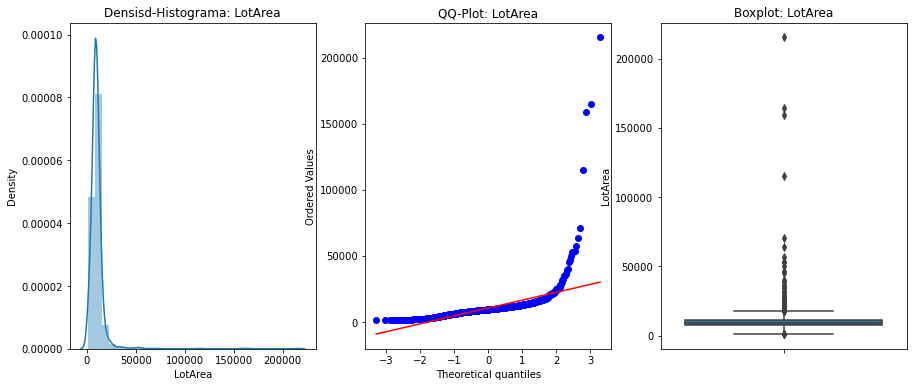

c:\Users\oguti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


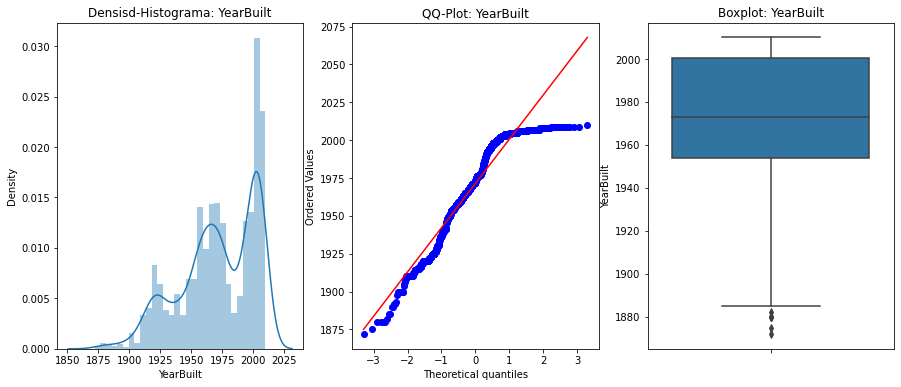

c:\Users\oguti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


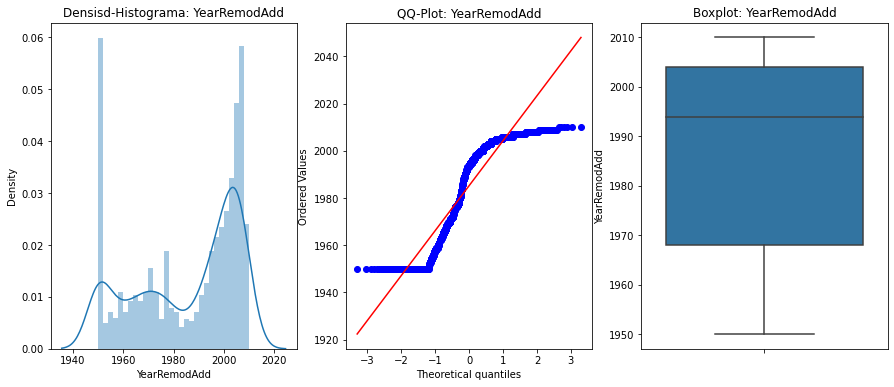

c:\Users\oguti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


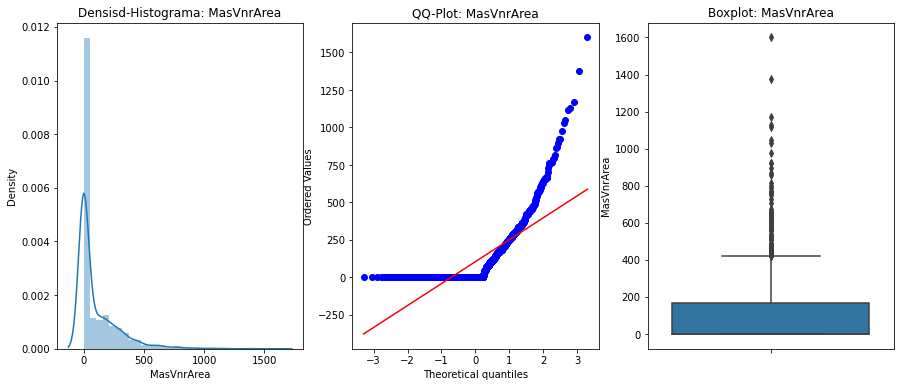

c:\Users\oguti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


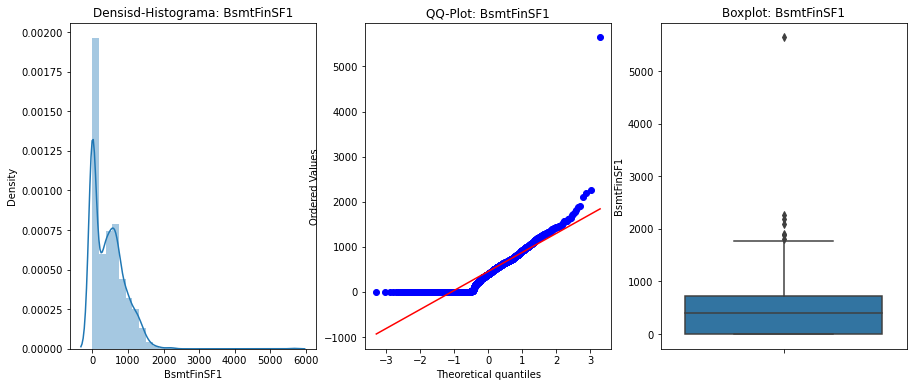

c:\Users\oguti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


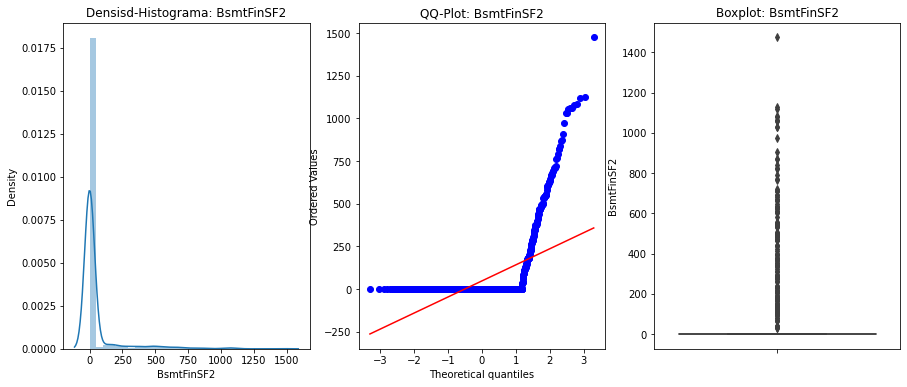

c:\Users\oguti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


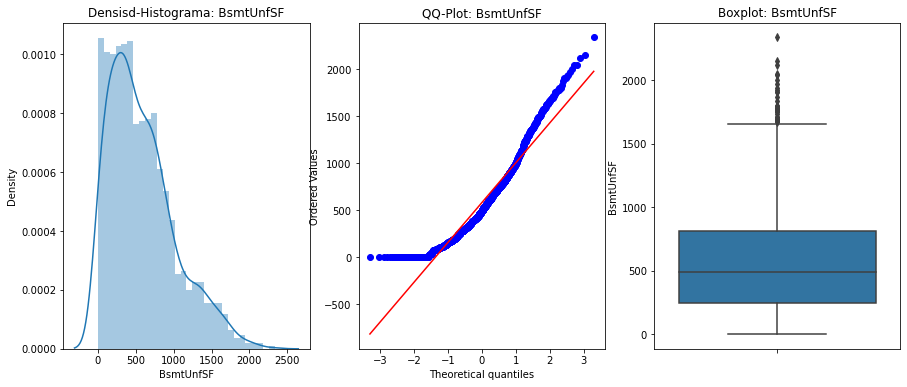

c:\Users\oguti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


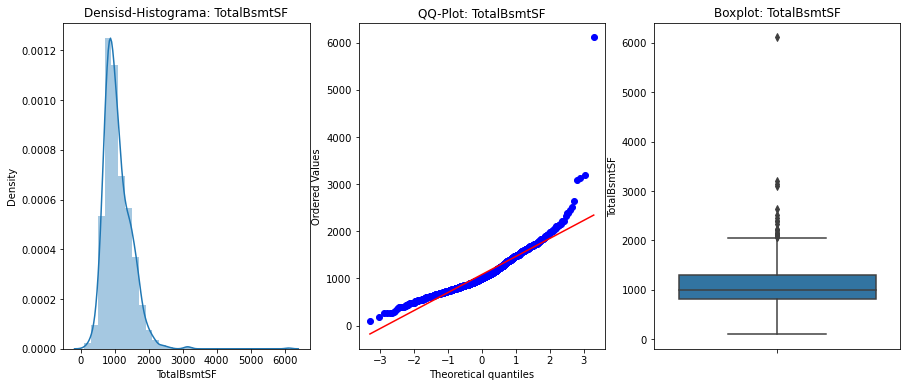

c:\Users\oguti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


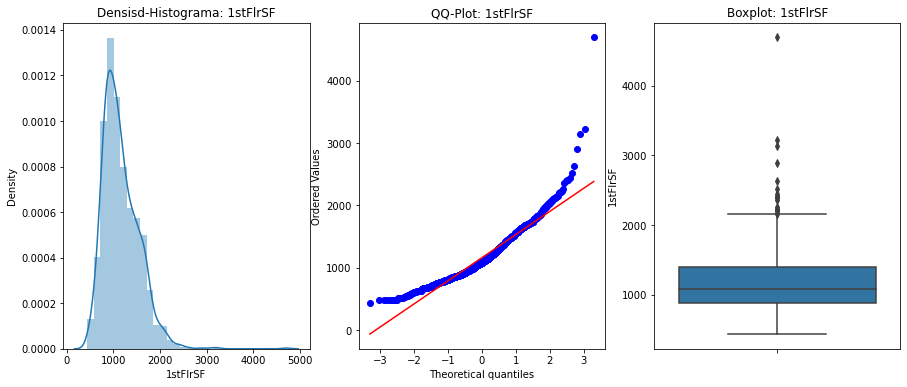

c:\Users\oguti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


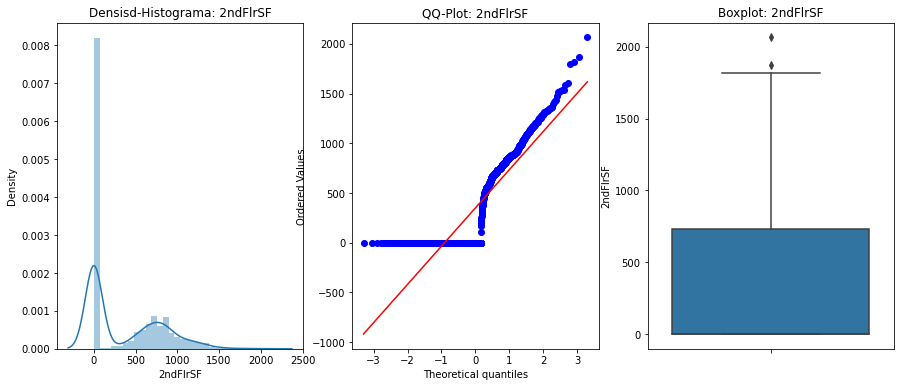

c:\Users\oguti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


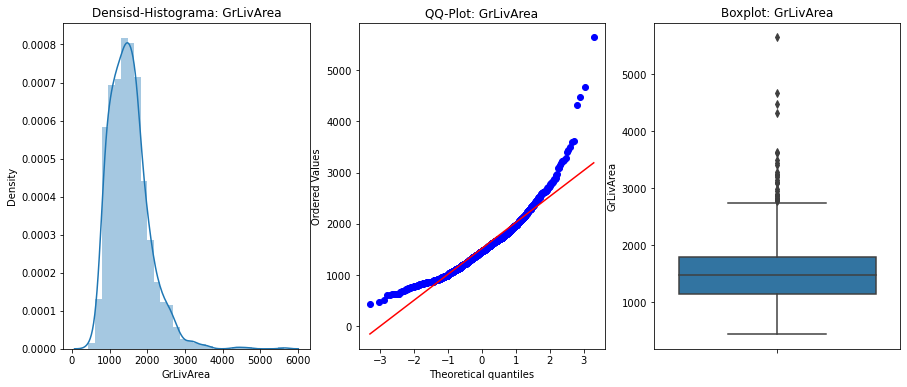

c:\Users\oguti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


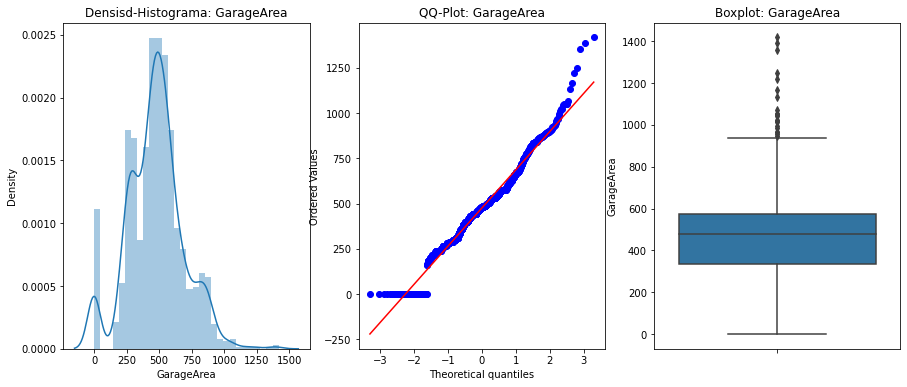

c:\Users\oguti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


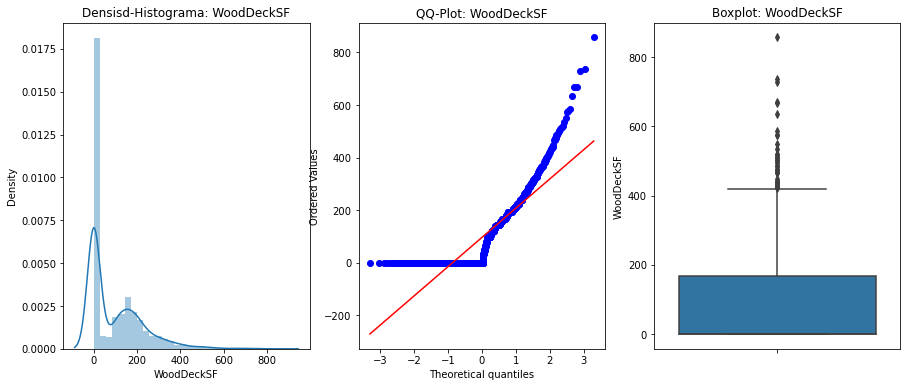

c:\Users\oguti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


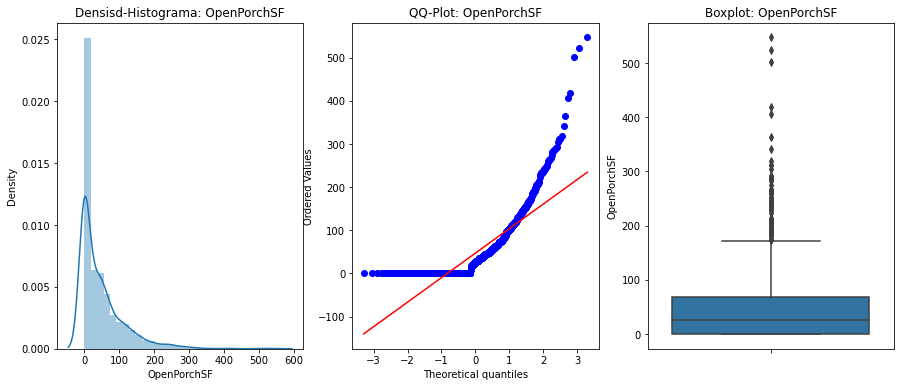

c:\Users\oguti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


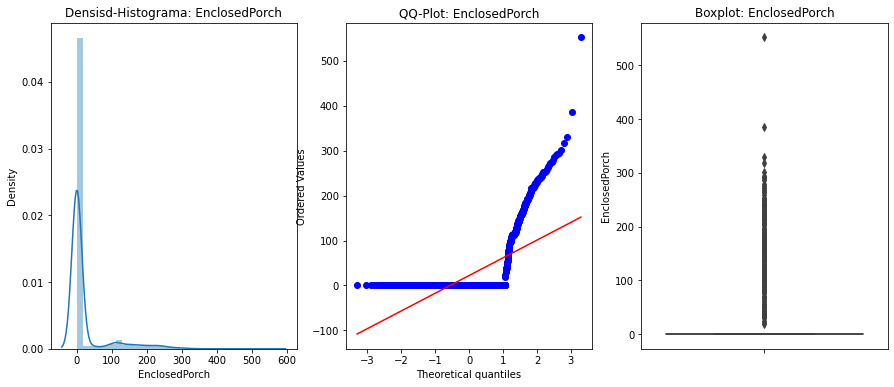

c:\Users\oguti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


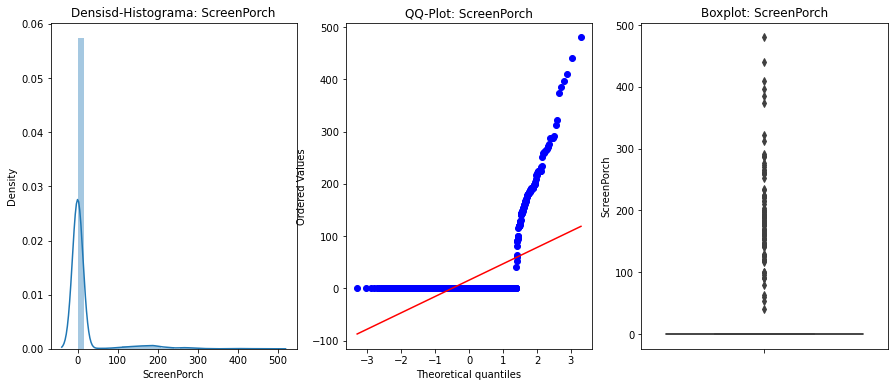

c:\Users\oguti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


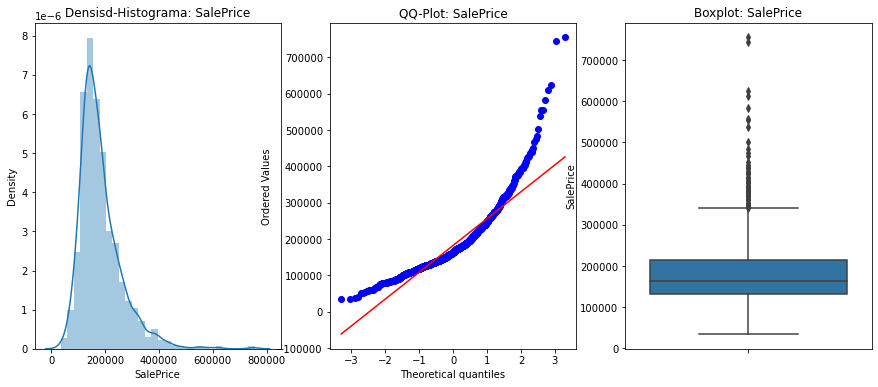

In [106]:
for col in numeric_cont_vars:
    inspect_outliers(datacap, col)

In [107]:
for col in numeric_cont_vars:
    outlier_treatment(datacap, col, 1.75)

c:\Users\oguti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


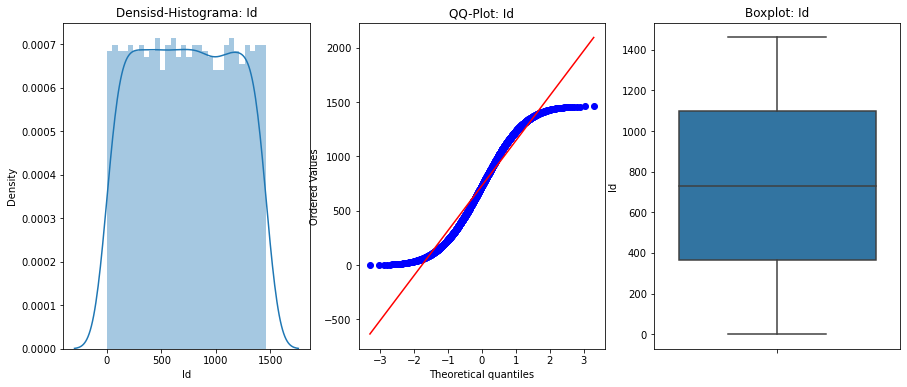

c:\Users\oguti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


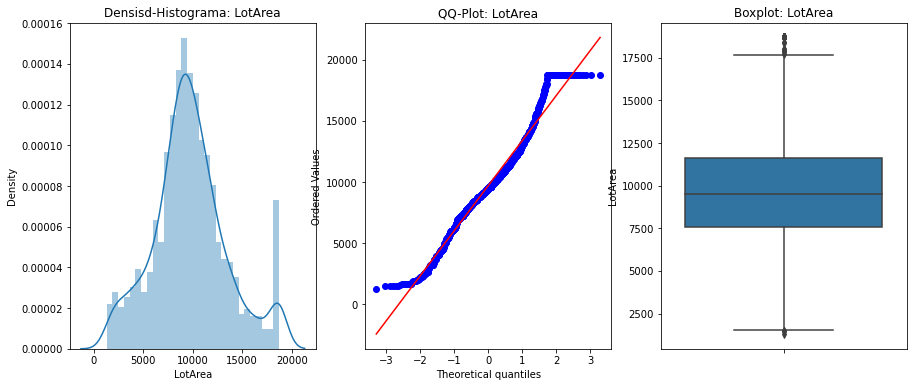

c:\Users\oguti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


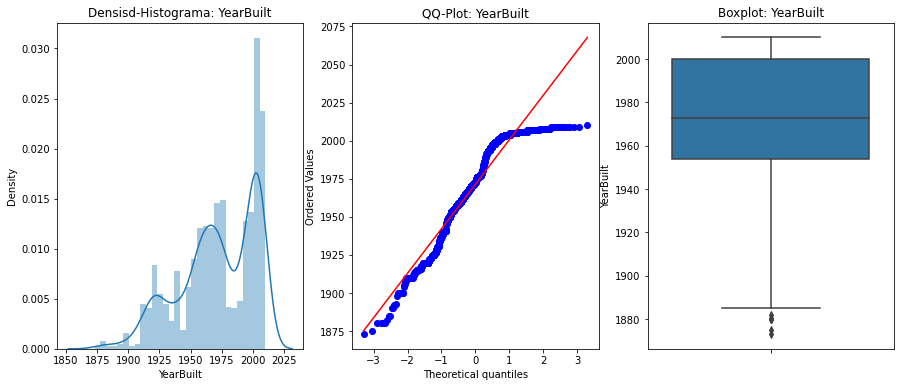

c:\Users\oguti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


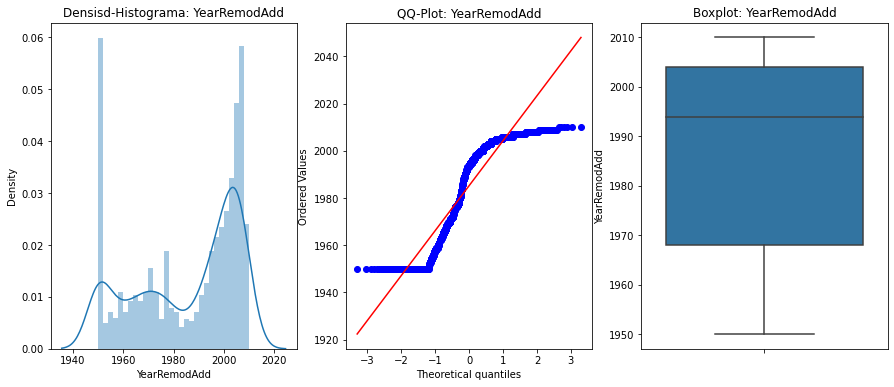

c:\Users\oguti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


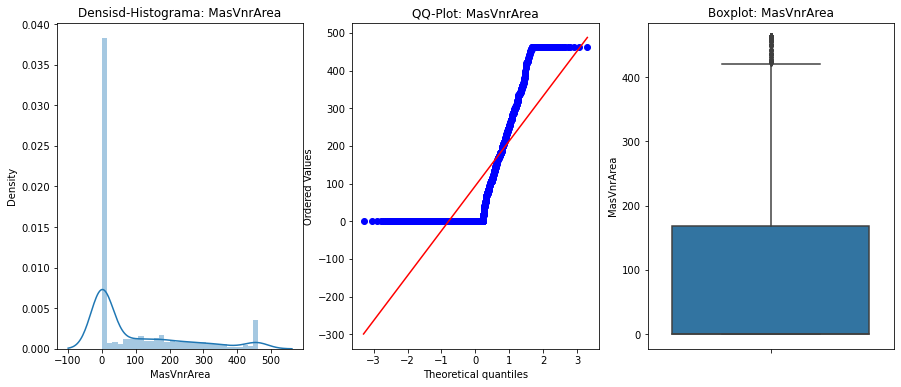

c:\Users\oguti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


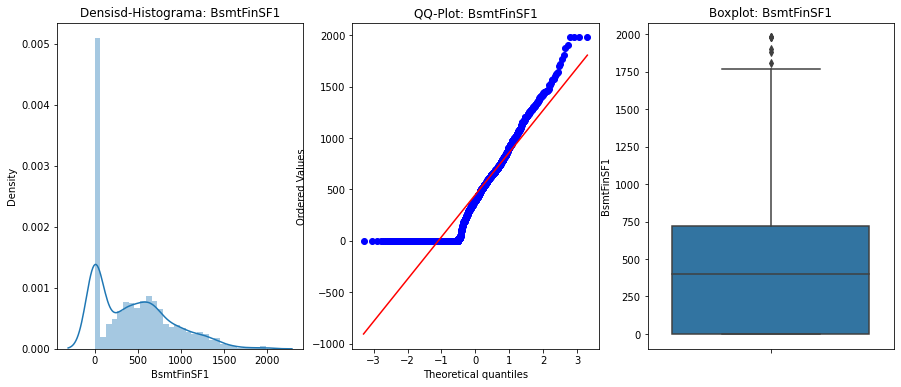

c:\Users\oguti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\oguti\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


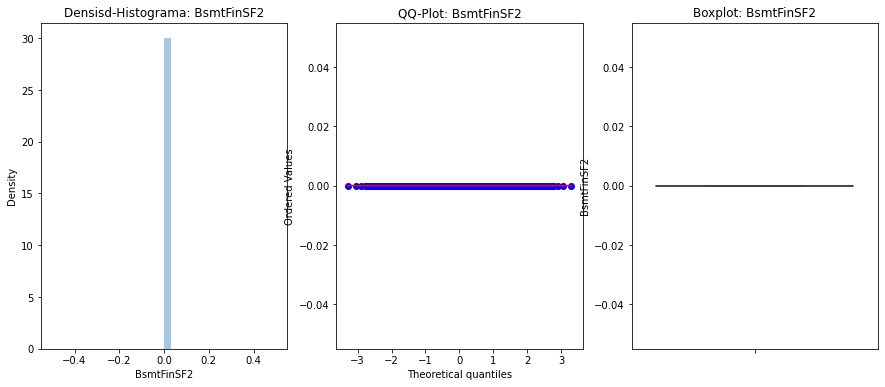

c:\Users\oguti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


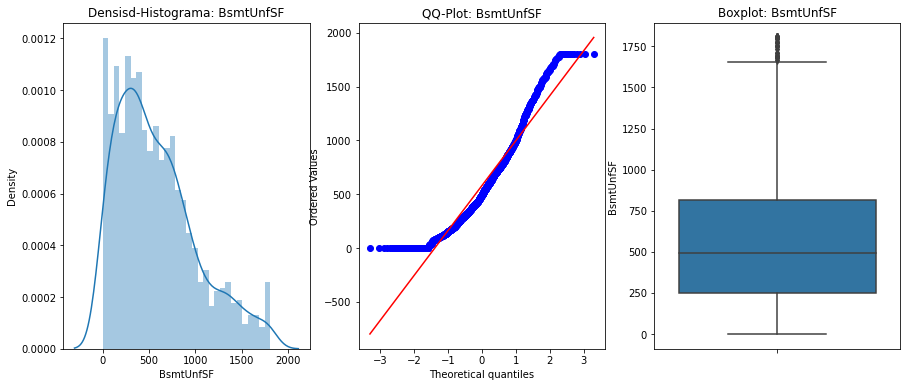

c:\Users\oguti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


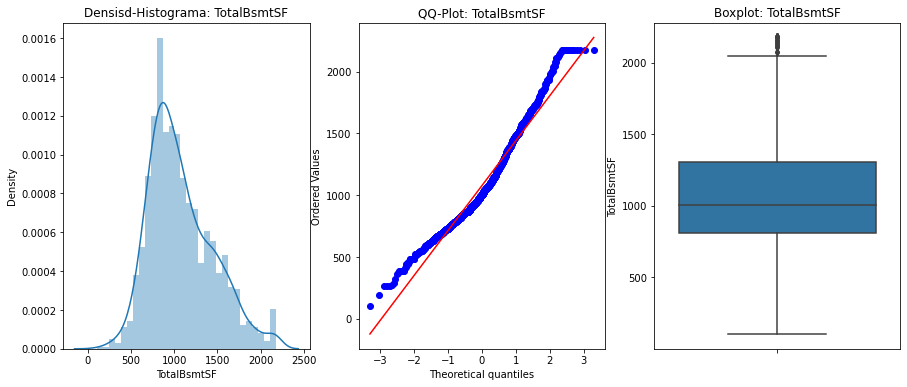

c:\Users\oguti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


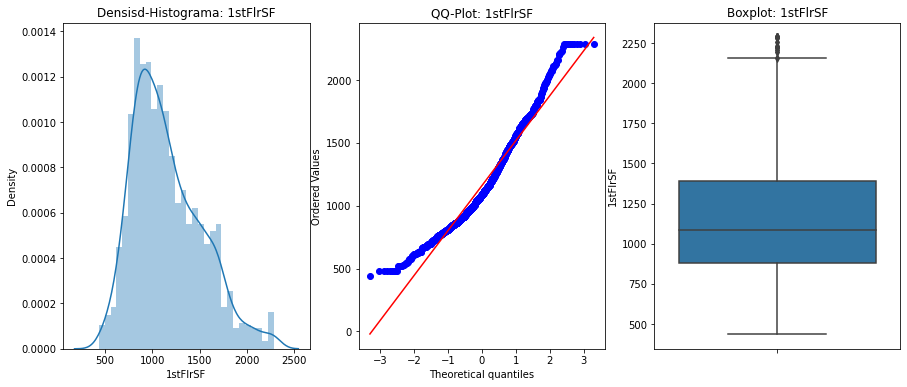

c:\Users\oguti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


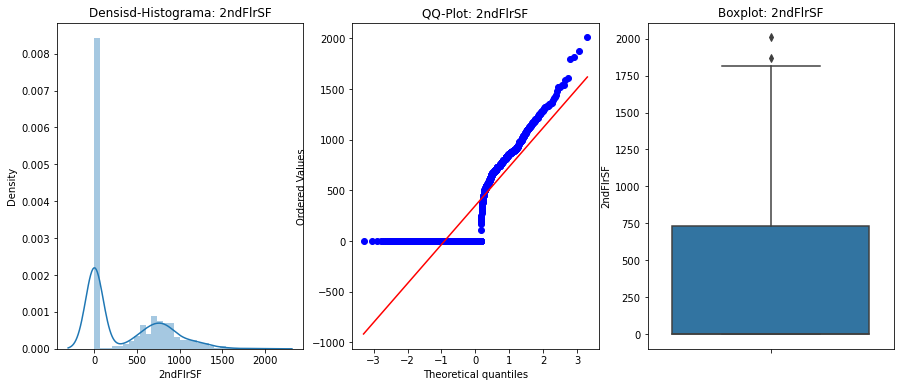

c:\Users\oguti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


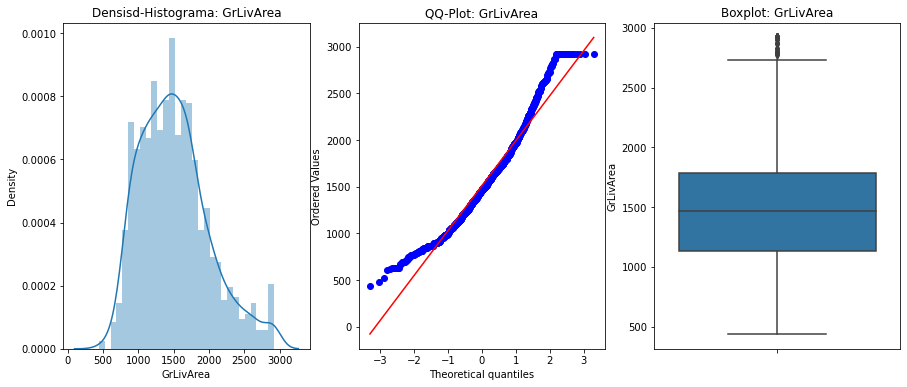

c:\Users\oguti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


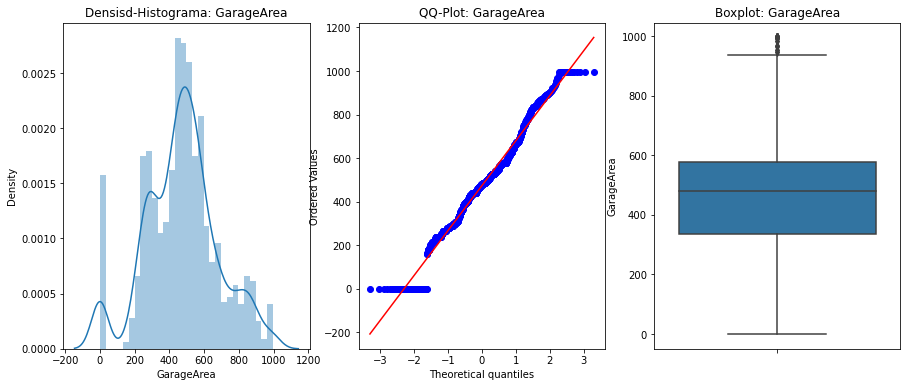

c:\Users\oguti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


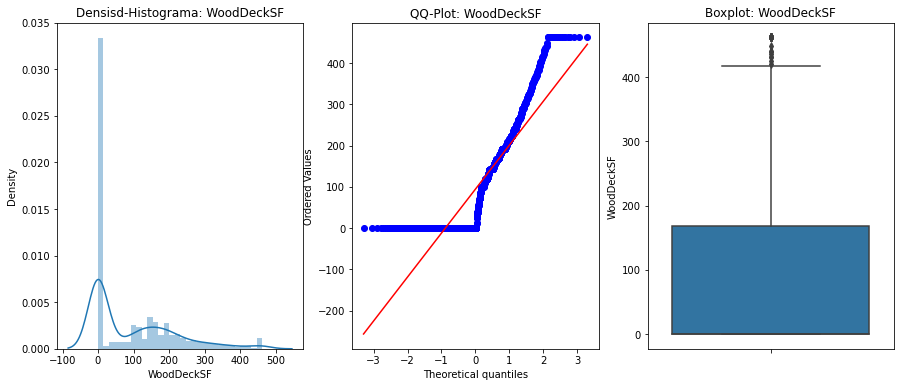

c:\Users\oguti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


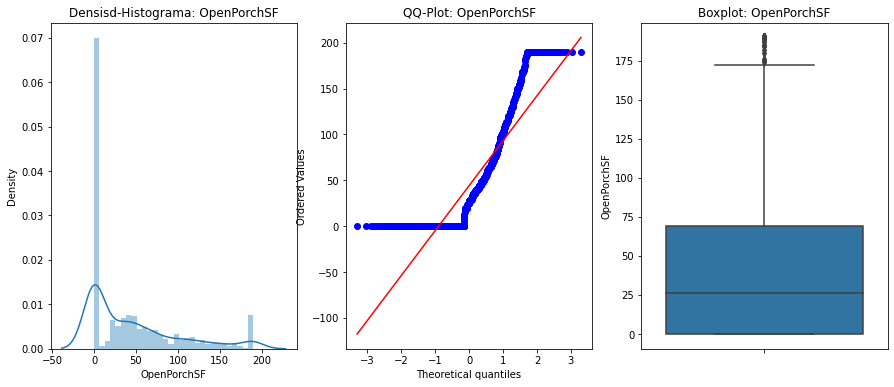

c:\Users\oguti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\oguti\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


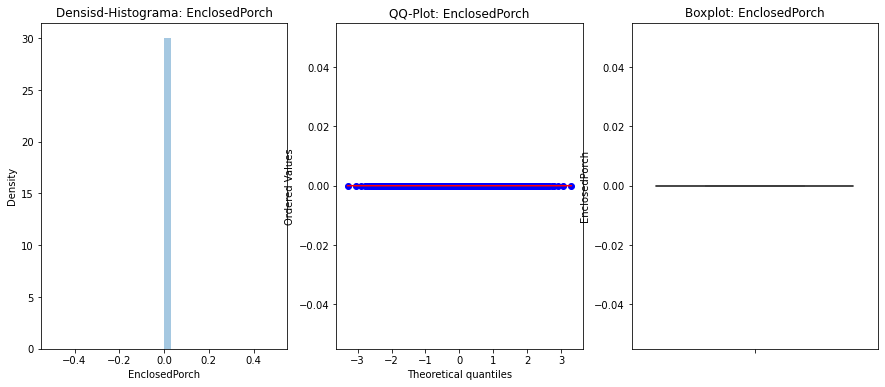

c:\Users\oguti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\oguti\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


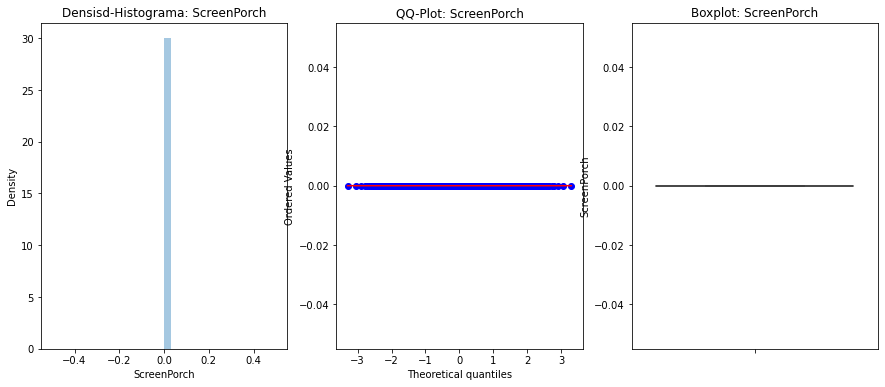

c:\Users\oguti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


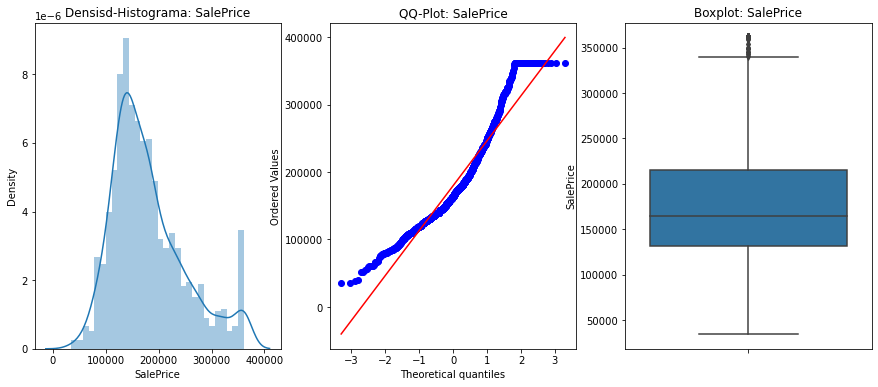

In [108]:
for col in numeric_cont_vars:
    inspect_outliers(datacap, col)

### Feature Scaling

###### Los algoritmos que están basados en linealidad son sensibles a la escala de las variables
###### consiste en normalizar los valores del conjunto de variables de un dataset
###### Típicamente, el procedimiento de FS es el ultimo paso antes de entrenar el modelo de ML

In [109]:
from sklearn.preprocessing import StandardScaler

In [110]:
datafs = datacap

In [111]:
datafs.shape

(1412, 71)

In [112]:
dataset_temp = datafs.loc[:, numeric_cont_vars]

In [113]:
dataset_temp.describe()

,Id,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
count,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.0,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.0,1412.0,1412.000000
mean,729.773371,9695.353931,1971.429223,1985.191218,94.243626,450.666254,0.0,579.229063,1076.449850,1158.604462,350.902886,1510.743095,473.526912,94.563031,44.084101,0.0,0.0,179698.930949
std,422.443710,3712.467294,30.369280,20.462484,142.109041,434.158987,0.0,431.790639,370.278951,364.956519,437.587693,489.737730,208.268172,119.702257,54.975820,0.0,0.0,68979.537099
min,1.000000,1300.000000,1873.062500,1950.000000,0.000000,0.000000,0.0,0.000000,105.000000,438.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.0,0.0,34900.000000
25%,364.750000,7572.750000,1954.000000,1968.000000,0.000000,0.000000,0.0,247.000000,809.500000,882.000000,0.000000,1135.750000,336.000000,0.000000,0.000000,0.0,0.0,131475.000000
50%,727.500000,9500.000000,1973.000000,1994.000000,0.000000,399.000000,0.0,490.000000,1004.000000,1086.000000,0.000000,1467.000000,480.000000,0.000000,26.000000,0.0,0.0,164600.000000
75%,1098.250000,11618.250000,2000.250000,2004.000000,168.000000,719.250000,0.0,813.250000,1306.750000,1392.000000,730.500000,1784.500000,576.000000,168.000000,69.000000,0.0,0.0,215000.000000
max,1460.000000,18697.875000,2010.000000,2010.000000,462.000000,1977.937500,0.0,1804.187500,2176.937500,2284.500000,2008.875000,2919.812500,996.000000,462.000000,189.750000,0.0,0.0,361168.750000


In [114]:
scaler = StandardScaler()
scaler.fit(datafs) 

StandardScaler()

In [115]:
dataset_temp_scaled = pd.DataFrame(scaler.transform(datafs), columns=datafs.columns)

In [116]:
np.round(dataset_temp_scaled.describe(), 2)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MasVnrArea_cap
count,1412.00,1412.00,1412.00,1412.00,1412.00,1412.00,1412.00,1412.00,1412.00,1412.00,...,1412.00,1412.0,1412.00,1412.00,1412.00,1412.00,1412.00,1412.00,1412.00,1412.00
mean,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,...,-0.00,0.0,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,0.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.73,-0.87,-2.31,-2.26,-15.31,-3.04,-3.00,-37.56,-2.09,-4.31,...,-0.12,0.0,-0.07,-0.08,-1.97,-1.36,-2.76,-2.38,-2.10,-0.66
25%,-0.86,-0.87,0.52,-0.57,0.07,-1.04,0.34,0.03,-1.41,0.24,...,-0.12,0.0,-0.07,-0.08,-0.49,-0.61,0.39,0.47,-0.70,-0.66
50%,-0.01,-0.16,0.52,-0.05,0.07,0.72,0.34,0.03,0.62,0.24,...,-0.12,0.0,-0.07,-0.08,-0.12,0.14,0.39,0.47,-0.22,-0.66
75%,0.87,0.31,0.52,0.52,0.07,0.72,0.34,0.03,0.62,0.24,...,-0.12,0.0,-0.07,-0.08,0.62,0.90,0.39,0.47,0.51,0.52
max,1.73,3.15,0.52,2.43,0.07,0.72,0.34,0.03,0.62,0.24,...,17.15,0.0,18.00,31.25,2.10,1.65,0.39,0.47,2.63,2.59


In [117]:
import os 

In [118]:
os.makedirs('folder/subfolder', exist_ok=True)  
dataset_temp_scaled.to_csv('C:/Users/oguti/OneDrive/Documentos/00 Maestria Inteligencia de Negocios/6to Trimestre/03 Statistical Learning I/00 Tareas/04 Tarea/train_mod.csv') 